In [1]:
library(MatchIt)
library(survival)
library(survminer)
library(tidyr)
library(tableone)
library(TriMatch)

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma


Loading required package: scales

Loading required package: reshape2


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Loading required package: ez



In [4]:
df_survival <- read.csv("mimic_diuretic_survival.csv",as.is = TRUE)
df_survival <- as.data.frame(df_survival)
df_survival =  df_survival[,c("survival_28day","mortality_28d", "groupHPD","is_diu_byid")]
df_survival$group_creteria <- df_survival[ , "is_diu_byid"]
df_survival$group_creteria <- as.factor(df_survival$group_creteria)

# survival

In [ ]:
survival_curve <- function(data,title,survival_day,expire_flag){
    df_select <- data
    fit <- survfit(Surv(survival_day,expire_flag) ~ label, data = df_select)
    ggsurvplot(fit, data = df_select,
               surv.median.line = hv, 
               conf.int = TRUE,
              # risk.table = TRUE,
#               title=title,,
               pval = TRUE,
               #add.all = TRUE, 
               xlab = "Follow up time (days)",
               legend = c(0.2,0.2))
}


null device 
          1

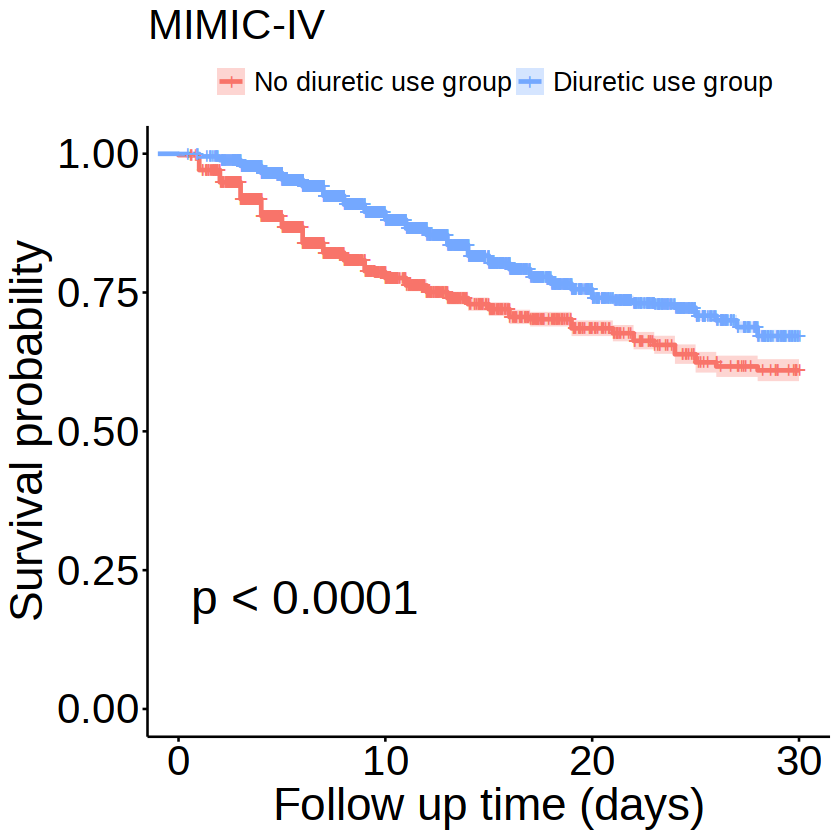

In [ ]:
# pdf("MIMIC_28d_mortality.pdf")
# png("MIMIC_28d_mortality.png")

df_select <- df_survival#[df_survival$groupHPD==1,]

fit <- survfit(Surv(survival_28day,mortality_28d) ~ group_creteria, data = df_select)
ggsurv <- ggsurvplot(fit, data = df_select, 
               conf.int = TRUE, 
#               risk.table = TRUE, 
               title="MIMIC-IV",
               pval = TRUE,pval.size = 10,
               #add.all = TRUE,
               xlab = "Follow up time (days)",
               palette = c("#f8746a" ,"#74a8ff","#3fc968"),
               #legend = "none",
               #legend = c(0.6,0.2),
               legend.title = "",
               legend.labs = c("No diuretic use group", "Diuretic use group"),
              font.main = 25,     
               font.x = 27,       
               font.y = 27,       
               font.tickslab = 16,
               risk.table.fontsize = 16,
tables.theme = theme_cleantable()+ theme( ))

ggsurv$plot <- ggsurv$plot +
  theme(legend.text = element_text(size = 16),axis.text.y = element_text(size = 25), axis.text.x = element_text(size = 25)) 
ggsurv$table <- ggsurv$table +
  theme(plot.title = element_text(size = 20, color = "black", face = "bold"))
ggsurv
dev.off()